# Plotting time series

This tutorial demonstrates how to plot time series data, which is frequently a focus in the analysis of molecular dynamics trajectories.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Included are three files, `c6.txt`, `c8.txt`, and `c10.txt`. Each are two columns wide and include time points and corresponding densities of molecular dynamics simulation boxes of bulk alkanes of each length. We can simply iterate through the files and plot our raw data.

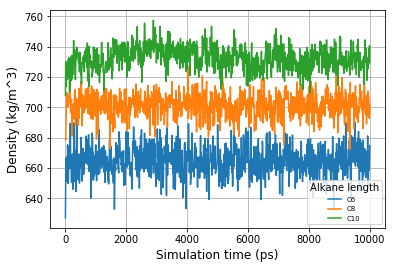

In [2]:
fig, ax = plt.subplots()

for alkane_length in [6, 8, 10]:
    t, rho = np.loadtxt('c{}.txt'.format(alkane_length)).T
    myline, = ax.plot(t, rho, '-', label='C{}'.format(alkane_length))

ax.set_xlabel('Simulation time (ps)')
ax.set_ylabel('Density (kg/m^3)')
ax.legend(title='Alkane length', loc='lower right', fontsize='x-small')

plt.show()

This is a decent starting point for analysis, but does not look good and would be difficult to draw meaningful conclusions from. These simulations are equilibrated, but naturally exhibit local density fluctuations due to finite system size. A technique called block averaging is used to average out short-time variations in time in order to focus on changes that occur over longer timescales.

In [3]:
def block_avg(data, block_size):
    """Break a 2d numpy array into blocks

    See https://github.com/tcmoore3/block_avg

    Parameters
    ----------
    data : np.ndarray, shape=(m, n)
        The data to block; must be a 2-dimensional array
    block_size : int
        The size of each block
    Returns
    -------
    blocks : np.ndarray, shape=(m/block_size, n)
        The block averaged data
    stds : np.ndarray, shape=(m/block_size, n)
        The standard deviation of each block
    Notes
    -----
    `m` must not necessarily be divisible by `block_size` ; in the case
    that it isn't, the data is trimmed *from the beginning* so that it is.
    """

    remainder = data.shape[0] % block_size
    if remainder != 0:
        data = data[remainder:]
    n_blocks = int(data.shape[0] / block_size)
    data = data.reshape((n_blocks, block_size, -1))
    blocks = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    return blocks, stds

Here, we break the data into chunks of 50 points and consider the average and standard deviation of each chunk. We can also use the function `ax.fill_between` to plot the standard deviaiton as lightly-shaded blocks behind the lines connecting the averages.

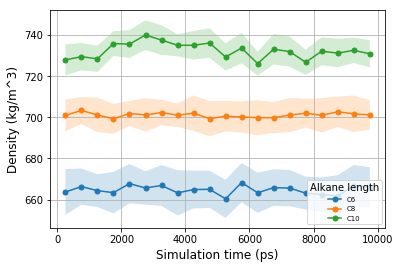

In [4]:
fig, ax = plt.subplots()

for alkane_length in [6, 8, 10]:
    t, rho = np.loadtxt('c{}.txt'.format(alkane_length)).T
    t_b, t_std = block_avg(t, 50)
    rho_b, rho_std = block_avg(rho, 50)
    t_b = t_b.reshape(-1)
    t_std = t_std.reshape(-1)
    rho_b = rho_b.reshape(-1)
    rho_std = rho_std.reshape(-1)  
    myline, = ax.plot(t_b,
                      rho_b,
                      marker='o',
                      markersize=5,
                      label='C{}'.format(alkane_length))
    ax.fill_between(t_b,
                    rho_b-rho_std,
                    rho_b+rho_std,
                    alpha=0.2,
                    facecolor=myline.get_color())

ax.set_xlabel('Simulation time (ps)')
ax.set_ylabel('Density (kg/m^3)')
ax.legend(title='Alkane length', loc='lower right', fontsize='x-small')

plt.show()